In [1]:
import pypulseq as pp

system = pp.Opts(max_grad=32, grad_unit='mT/m', max_slew=130, slew_unit='mT/m/ms')
seq = pp.Sequence(system=system)

In [2]:
Nx, Ny = 256, 256 # matrix size
fov = 220e-3 # field of view
delta_k = fov / Nx

# RF sinc pulse with a 90 degree flip angle
rf90 = pp.make_sinc_pulse(flip_angle=90, duration=2e-3, system=system, slice_thickness=5e-3, apodization=0.5,
   time_bw_product=4)

# Frequency encode, trapezoidal event
gx = pp.make_trapezoid(channel='x', flat_area=Nx * delta_k, flat_time=6.4e-3, system=system)

# ADC readout
adc = pp.make_adc(num_samples=Nx, duration=gx.flat_time, delay=gx.rise_time, system=system)

In [3]:
seq.add_block(rf90)
seq.add_block(gx, adc)

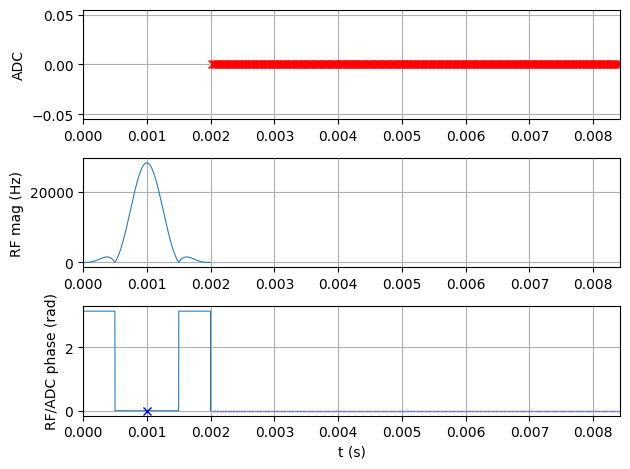

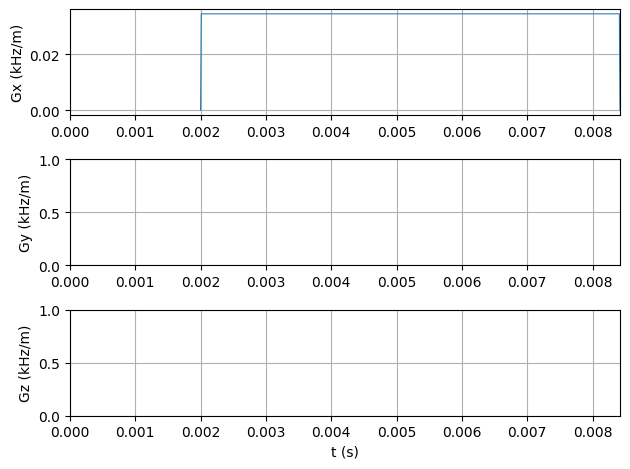

In [4]:
seq.plot()

In [ ]:
seq.write('demo.seq')

: 